In [3]:
!pip install d2l==1.0.0a1.post0 
# 꼭 이 버젼으로 설치하라고 하네요! 그냥하면 오류남.

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for gym: filename=gym-0.26.1-py3-none-any.whl size=826194 sha256=e1cb537fa3749df0a6f8d943342c4694a7fc3119adf4b685f6ce1e9f60a57222
  Stored in directory: c:\users\pro\appdata\local\pip\cache\wheels\c6\ec\16\6a36ce0db342e025635779e6716bdfd13030b266e670d60f0e
Successfully built gym


Regression 문제는 숫자 값을 예측하려고 할 때마다 사용한다. 일반적인 예로 가격 예측(주택, 주식 등), 입원 기간 예측(병원에 입원한 환자의 경우), 수요 예측(소매 판매) 등이 있다.   
예를 들어 면적(피트제곱)과 연식(년)에 따라 주택 가격(달러)을 추정한다고 가정합니다. 주택 가격 예측 모델을 개발하기 위해서는 각 주택의 판매 가격, 면적, 연식 등 판매로 구성된 데이터가 먼저 있어야한다.  
- 이때, 머신 러닝 용어로 데이터 세트를 **training set**라고 하고  
- 각 행(하나의 판매에 해당하는 데이터를 포함)을 **example(또는 data point , instance, sample)** 라고 합니다.   
- 우리가 예측하려고 하는 것(가격)을 **label(또는 target)** 이라고 합니다.  
- 예측의 기반이 되는 변수(연식 및 면적)를 **feature (또는 covariates**)이라고 합니다.

Linear regression은 regression문제를 해결하기 위한 간단하고 가장 유명한 표준 도구입니다.  
Linear regression은 몇가지 가정에서 나오는데,  
- 첫째로, feature x와 target y의 관계가 approximately linear라고 가정합니다. 즉, E[Y | X = **x**]의 조건부 평균은 feature **x**의 weighted sum으로 표현될 수 있습니다.  
- 둘째로, observation noise로 인해 기대값과 target값이 편차가 있을 수 있는데, 이는 가우시안 분포를 따르는 노이즈 텀을 추가하면 이런상황에서도 잘 동작 한다고 가정합니다.



일반적으로 데이터 세트의 examples 수를 n으로 표시합니다. 위 첨자를 사용하여 샘플과 대상을 열거하고 아래 첨자를 사용하여 좌표를 인덱싱합니다.  
**$x_j^{(i)}$에서 i-th는 샘플, j-th는 coordinate**

# 3.1.1.1 Model
핵심은 어떻게 feature가 target의 추정치로 변환 될 수 있는가? 이다. 


# $ price = w_{area} * area + w_{age} *age + b $  (3.1.1)

- 여기서 **w들은 weight**이고, **b는 bias, offset, intercept**라고 불림.
- bias는 모든 features가 0일때, 추정 값으로 판별될 수 있다. 면적이 0인 신축 주택은 절대 볼 수 없겠지만, bias는 여전히 필요하다. 
- 식(3.1.1)은 **weighted sum을 통한 linear transform**과 **bias를 추가한 translation**이 결합된 input features의 affine transformation다. 
- 주어진 데이터 세트에서 우리의 목표는 평균적으로 우리 모델의 예측이 데이터에서 관찰된 실제 가격에 가능한 한 가깝게 일치하도록 가중치 w와 편향 b를 선택하는 것

# $ \hat{y} = w_1  x_1 + ... + w_d  x_d + b $  (3.1.2)

- 머신러닝에서 우리는 일반적으로 고차원 데이터 세트로 작업하기 때문에, (3.1.1)과 다르게 여기서 컴팩트 선형 대수 표기법을 사용하는 것이 더 편리합니다. 
- 입력이 d개의 feature으로 구성될 때 각각의 인덱스(1과 d 사이)를 할당하고 예측 y_hat(일반적으로 "hat" 기호는 추정치를 나타냄)을 다음과 같이 표현할 수 있습니다.

줄여 쓰면,

# $ \hat{y} = \mathbf{w}^\top \mathbf{x} + b $  (3.1.3)
가 되고, 

# $ {\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b $  (3.1.4)

n개의 example에 대해서로 확장한다면,  
**X**가 매트릭스가 되고, **w**가 벡터가 되고, $ {\hat{\mathbf{y}}} $도 벡터가 되는 3.1.4와 같은 식이 된다.

- 훈련 데이터 세트 X의 feature과 target(알려진) 레이블 y가 주어지면,   
- 선형 회귀의 목표는 $x$와 동일한 분포에서 샘플링된 새 데이터 예제의 특성을 제공하는 가중치 벡터 w와 편향 항 b를 찾는 것.

$ \mathbf{x} $에 대해 $ \mathbf{y} $를 예측하는 베스트 모델이 리니어하다고 믿더라도,  
우리는 모든 n개의 example에 대해서 $ y^{(i)}$ 가 정확히 $ w^{T}x^{(i)}+b$와 같은 실제 세계의 n개의 example의 dataset을 찾을 수 있을것이라고 기대할 수 없다.  
예를 들어, 특징 x과 라벨 y을 관찰하기 위해 사용하는 모든 도구는 약간의 측정 오류를 겪을 수 있다.  
따라서, 기본 관계가 선형이라고 확신하는 경우에도 이러한 오류를 설명하기 위해서는 우리는 noise term을 포함 시킬 수 있다.  
(통계쪽 linear regression에서는 noise term을 포함한 식이 일반적이라고 함)

 파라메터 $ w $ 를 찾기 위해서는 두 가지가 더 필요다. 
 - 하나는 현재 모델의 품질(quality)를 측정하는 방법
 - 두번째는 품질을 향상시킬 수 있는 방법

# 3.1.1.2 Loss Function

Loss Function는 목표의 실제 값과 예측 값 사이의 거리를 수량화한다.  
**loss는 일반적으로 값이 작을수록 더 좋고, 완벽한 예측은 0의 loss를 만드는 것.  **

회귀 문제의 경우 가장 일반적인 손실 함수는 **squared error**입니다.  
어떤 example i의 예측값이 $ {\hat{\mathbf{y}}} $고, true label은 $ y^{(i)} $ 라면, squared error는 다음과 같습니다.  

# $ l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$ (3.1.5)

상수 1/2는 실제 차이는 없지만 loss를 미분할 때 상쇄되기 때문에 표기상의 편리로 포함된다.  
training dataset이 우리에게 주어져서 우리가 통제할 수 없기 때문에, empirical error는 model parameters뿐.  
아래에서 1차원 입력 문제에서 선형 회귀 모델의 적합성을 시각화합니다(Fig 3.1.1)

![fit-linreg](fit-linreg.svg) Fig 3.1.1

추정치 $ {\hat{\mathbf{y}}} $과 목표값 $ y^{(i)} $  사이의 큰 차이는 손실의 2차 형태로 인해 손실에 더 큰 기여를 한다는 점을 알고 있어야 합니다.  
전체 examples에서 모델의 품질을 측정하기 위해 단순히 training set의 loss를 평균화한다.  

# $ L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$ (3.1.6)

모델을 트레이닝 하는것은 결국 example의 total loss를 minimize한 (w*, b*)파라미터를 찾기

# $\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$

# 3.1.1.3. Analytic Solution

가끔 운이 좋아서 선형회귀를 분석적 솔루션으로 해결할 수 있다. 하지만 대부분의 딥러닝에선 거의 불가능  

# $ \mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y} $

# 3.1.1.4. Minibatch Stochastic Gradient Descent

분석적 솔루션이 안될때는 손실 함수를 점진적으로 낮추는 방향으로 매개변수를 업데이트하여 오류를 반복적으로 줄이는 것으로 구성된다. 
### 이 알고리즘을 경사하강법이라고 함

경사하강법의 가장 naive한 적용은 데이터 세트의 **모든 단일 예에서 계산된 손실의 평균인 손실 함수의 미분을 취하는 것**  
- 하지만 이것은 매우 느릴 수 있다.  
- 또한, 단일 업데이트를 수행하기 전에 전체 데이터 세트를 전달해야 한다.  
- 더욱이 훈련 데이터에 중복이 많으면 전체 업데이트의 이점이 훨씬 더 낮아진다.  

다른 극단적인 방법으로는 한번에 하나의 예만 고려하는 법이 있으나, 컴퓨팅 파워상 이점이 전혀 없다.  
결국 중간 전략을 택하는게 Minibatch Stochastic Gradient Descent

전체, 혹은 단일 대신 mini batch를 취한다. 해당 mini batch의 크기에 대한 구체적인 선택은 메모리 양, 가속기 수, 계층 선택 및 총 데이터 세트 크기와 같은 많은 요인에 따라 다름.  
관행적으로 32에서 256 사이의 숫자, 바람직하게는 2의 큰 거듭제곱의 배수  


# $ (\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b) $ (3.1.10)

각 이터레이션 $ t$  
training example에서 고정숫자 $|B|$개로 구성된, 랜덤 샘플된 미니배치 $ B_t $  

1. 미니배치의 평균 손실의 미분(기울기)을 계산  
2. 작은 양수$\eta$를 곱하는데, 이게 learning rate
3. 이 값을 원래 값에서 뺀다.


# $\begin{split}\begin{aligned} \mathbf{w} & \leftarrow \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) && = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_b l^{(i)}(\mathbf{w}, b) &&  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}\end{split} $

(제생각엔 x(i)가 잘못들어간것 같음..)

미니배치 B를 선택하기 때문에 |B| 크기로 정규화해야 한다.  
mini batch size와 learning rate는 사용자가 정의합니다. 훈련 루프에서 업데이트되지 않는 조정 가능한 매개변수를 하이퍼파라미터라고 합니다.  
마지막으로, 솔루션의 품질은 일반적으로 별도의 검증 데이터 세트(또는 검증 세트)에서 평가됩니다.

미리 결정된 횟수만큼 훈련한 후(또는 다른 중지 기준이 충족될 때까지) $ {\hat{\mathbf{w}}}, {\hat{{b}}} $로 표시된 추정된 모델 매개변수를 기록한다.  
우리의 함수가 진정으로 선형이고 잡음이 없더라도 이 매개변수는 손실의 exact minimizers 또는 even deterministic하지 않을 것이다.  
알고리즘은 minimizers로 천천히 수렴하지만 일반적으로 유한한 단계에서 정확하게 달성할 수 없다.  
또한 매개 변수를 업데이트하는 데 사용되는 미니 배치 B는 무작위로 선택되기 때문에 이것은 determinism을 깨뜨린다.  

선형 회귀는 전역 최소값이 있는 학습 문제로 발생합니다($ \mathbf{X}$가 full rank일 때 또는 이와 동등하게 $ {\mathbf{X}^T\mathbf{X}} $가 invertible 때). 그러나 깊은 네트워크의 손실 표면에는 많은 saddle points과 minima가 포함된다.  
다행히도 우리는 일반적으로 정확한 매개변수 집합을 찾는 데 관심이 없고 정확한 예측(따라서 낮은 손실)으로 이어지는 매개변수 집합에만 관심이 있습니다.  
해야할 일은 이전에 본 적이 없는 데이터에 대한 정확한 예측으로 이어지는 매개변수를 찾는 것인데, 이를 generalization라고 한다.

# 3.1.1.5 Predictions
모델 $ \hat{w}^Tx +\hat{b} $가 주어지면, 예를 들어 면적 $ x_1 $ 과 연식 $ x_2 $ 가 주어지면 이전에 보지 못한 주택의 판매 가격을 예측하기 위해 새로운 예에 대한 예측을 할 수 있다.  

# 3.1.2. Vectorization for Speed

In [12]:
import math
import time
import numpy as np
import torch
import random

n = 10000
a = torch.ones(n)
b = torch.ones(n)

# solution 1
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
print(f'solution 1 elapsed time = {time.time() - t:.5f} sec')

# solution 2
t = time.time()
d = a + b
print(f'solution 2 elapsed time = {time.time() - t:.5f} sec')

solution 1 elapsed time = 0.13368 sec
solution 2 elapsed time = 0.00000 sec


여기선 당연히 solution2가 빠르다. vectorization 연산을 써야한다.

# 3.1.3. The Normal Distribution and Squared Loss
지금까지 우리는 제곱 손실 목표에 대해 functional motivation을 부여했다.  
기본 패턴이 실제로 선형일 때마다 최적 매개변수는 조건부 기대값 E[Y|X]를 반환하고 손실은 이상값에 대해 큰 페널티를 할당합니다.  
또한 노이즈 분포에 대한 확률적 가정을 함으로써 제곱 손실 목표에 대한 보다 형식적인 동기를 제공할 수 있습니다.  

# $p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$ (3.1.12)

![output_linear-regression_d0729f_53_0](output_linear-regression_d0729f_53_0.svg)

평균을 변경하는 것은 가로축을 따른 이동에 해당하며, 분산을 늘리면 분포가 확산되고 피크가 낮아진다.

# $ y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0, \sigma^2). $ (3.1.13)

따라서 이제 주어진 x에 대해 특정 y를 발견할 likelihood에 대해 다음과 같이 쓸 수 있다.
# $ P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right). $ (3.1.14)

따라서 likelihood는 인수분해된다. maximum likelihood의 원칙에 따르면 매개변수의 최상의 값은 전체 데이터 세트의 가능성을 최대화하는 값입니다.

# Linear Regression as a Neural Network
![singleneuron](singleneuron.svg)

입력은 $x_1, \ldots, x_d$.  
$d$를 **the number of inputs** or **feature dimensionality in the input layer**라고 한다.  
network의 출력은 $o_1$.  
우리는 하나의 숫자 값을 예측하려고 하기 때문에 출력 뉴런은 하나만 있다.  
요약하면 선형 회귀를 단일 계층 fully connected neural network으로 생각할 수 있다.  
이후 챕터에서 이게 훨씬 더 늘어난다.

# Biology

![neuron](neuron.svg)

다른 뉴런(또는 환경 센서)에서 도착한 정보 $x_i$는 Dendrites에서 수신됩니다. 특히, 해당 정보는 synaptic weights $w_i$에 의해 가중치가 부여되어 입력의 효과(예:  $x_iw_i$의 내적을 통한 활성화 또는 억제)를 결정합니다.  
여러 소스에서 도착한 가중치 입력은 가중치 합으로 nucleus에 집계되며, 일부 비선형 후처리가 적용될 수 있습니다.  
그런 다음 이 정보는  axon terminals를 통해 axon으로 보내져 목적지(예: 근육과 같은 작동기)에 도달하거나 dendrites를 통해 다른 뉴런으로 공급됩니다.

확실히, 이러한 많은 단위가 올바른 연결성 및 올바른 학습 알고리즘과 결합되어 하나의 뉴런 단독으로 표현할 수 있는 것보다 훨씬 더 흥미롭고 복잡한 행동을 생성할 수 있다는 높은 수준의 아이디어는 실제 생물학적 신경 시스템에 대한 연구 덕분입니다.  

# Summary
- 이 섹션에서는 training set에서 squared loss을 최소화하기 위해 선형 함수의 매개변수를 선택하는 전통적인 linear regression을 소개했다.  
- 선형 모델이 입력이 출력에 직접 연결되는 간단한 신경망으로 표현될 수 있는 방법을 보였다.  

# 3.2 Object-Oriented Design for Implementation

훈련 구현 세부 사항을 살펴보기 전에 이 책 전체에서 사용되는 일부 API를 알아보는 것이 좋다.  
딥 러닝의 구성 요소를 객체로 취급하면 이러한 객체와 상호 작용에 대한 클래스를 정의하는 것으로 시작할 수 있다.  
구현을 위한 이 객체 지향 디자인은 프레젠테이션을 크게 간소화한다.

PyTorch Lightning과 같은 오픈 소스 라이브러리에서 영감을 받아 높은 수준에서 세 가지 클래스를 만들려고 한다. 
- (i) Module: 에는 모델, 손실 및 최적화 방법이 포함됩니다. 
- (ii) DataModule: 교육 및 검증을 위한 데이터 로더를 제공합니다. 
- (iii) 두 클래스는 Trainer 클래스를 사용하여 결합되어 다양한 하드웨어 플랫폼에서 모델을 학습할 수 있습니다.  
이 책의 대부분의 코드는 Module과 DataModule을 적용합니다.  
GPU, CPU, 병렬 훈련 및 최적화 알고리즘에 대해 논의할 때만 Trainer 클래스를 다룰 것입니다.

# 3.2.1. Utilities

Jupyter 노트북에서 객체 지향 프로그래밍을 단순화하려면 몇 가지 유틸리티가 필요합니다. 문제 중 하나는 클래스 정의가 상당히 긴 코드 블록을 만드는 경향이 있다는 것입니다. 노트북 가독성을 위해서는 설명이 산재된 짧은 코드 조각이 필요하며, 이는 Python 라이브러리에 일반적인 프로그래밍 스타일과 호환되지 않는 요구 사항입니다. 첫 번째 유틸리티 함수를 사용하면 클래스가 생성된 후 함수를 클래스의 메서드로 등록할 수 있습니다. 사실, 우리는 클래스의 인스턴스를 생성한 후에도 그렇게 할 수 있습니다! 이를 통해 클래스 구현을 여러 코드 블록으로 분할할 수 있습니다.  


Jupyter 노트북에서 객체 지향 프로그래밍을 단순화하려면 몇 가지 유틸리티가 필요합니다. 문제 중 하나는 클래스 정의가 상당히 긴 코드 블록을 만드는 경향이 있다는 것입니다. 노트북 가독성을 위해서는 설명이 산재된 짧은 코드 조각이 필요하며, 이는 Python 라이브러리에 일반적인 프로그래밍 스타일과 호환되지 않는 요구 사항입니다. 첫 번째 유틸리티 함수를 사용하면 클래스가 생성된 후 함수를 클래스의 메서드로 등록할 수 있습니다. 사실, 우리는 클래스의 인스턴스를 생성한 후에도 그렇게 할 수 있습니다! 이를 통해 클래스 구현을 여러 코드 블록으로 분할할 수 있습니다.  


사용 방법을 간단히 살펴보겠습니다. do 메소드를 사용하여 클래스 A를 구현할 계획입니다. A와 do 모두에 대한 코드를 동일한 코드 블록에 두는 대신 먼저 클래스 A를 선언하고 인스턴스 a를 생성할 수 있습니다.  


다음으로 우리는 일반적으로 하던 대로 메소드 do를 정의하지만 클래스 A의 범위에서는 정의하지 않습니다. 대신, 우리는 클래스 A를 인수로 사용하여 add_to_class에 의해 이 메소드를 장식합니다. 그렇게 함으로써 메서드는 A의 정의의 일부로 정의된 경우 예상대로 A의 멤버 변수에 액세스할 수 있습니다. 인스턴스에 대해 호출할 때 어떤 일이 발생하는지 봅시다.  

In [13]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l
import random

In [2]:
def add_to_class(Class):  #@save
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

class A:
    def __init__(self):
        self.b = 1

a = A()

@add_to_class(A)
def do(self):
    print('Class attribute "b" is', self.b)

a.do()

Class attribute "b" is 1


두 번째는 클래스의 __init__메서드에 있는 모든 인수를 클래스 속성으로 저장하는 유틸리티 클래스입니다. 이를 통해 추가 코드 없이 암시적으로 생성자 호출 서명을 확장할 수 있습니다.

In [5]:
# Call the fully implemented HyperParameters class saved in d2l
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


마지막 유틸리티를 사용하면 실험이 진행되는 동안 대화식으로 실험 진행 상황을 플롯할 수 있습니다. 훨씬 더 강력하고 복잡한 TensorBoard를 참조하여 이름을 ProgressBoard로 지정합니다. 구현은 섹션 20.7로 연기됩니다. 지금은 간단하게 동작을 살펴보겠습니다.

그리기 함수는 범례에 지정된 레이블을 사용하여 Figure에 점(x, y)을 플로팅합니다. 선택 사항인 every_n은 그림에서 1/n개의 점만 표시하여 선을 매끄럽게 만듭니다. 해당 값은 원래 그림의 n개의 인접 지점에서 평균을 냅니다.

In [6]:
class ProgressBoard(d2l.HyperParameters):  #@save
    """Plot data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

다음 예에서는 다른 부드러움으로 sin과 cos를 그립니다. 이 코드 블록을 실행하면 애니메이션에서 선이 늘어나는 것을 볼 수 있습니다.

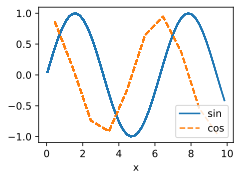

In [8]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

# 3.2.2 Models

Module 클래스는 우리가 구현할 모든 모델의 기본 클래스입니다. 최소한 세 가지 method를 정의해야 합니다. 
- __init__ 메서드는 학습 가능한 매개변수를 저장하고, 
- training_step 메서드는 데이터 배치를 받아 손실 값을 반환하고, 
- configure_optimizers 메서드는 학습 가능한 매개변수를 업데이트하는 데 사용되는 최적화 메서드 또는 그 목록을 반환합니다.  
- 선택적으로 validation_step을 정의하여 평가 측정을 보고할 수 있습니다. 
- 때때로 우리는 출력을 계산하는 코드를 분리된 forward 메서드에 넣어 더 재사용할 수 있도록 합니다.

In [9]:
class Module(nn.Module, d2l.HyperParameters):  #@save
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()
    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

Module이 PyTorch 신경망의 기본 클래스인 nn.Module의 하위 클래스임을 알 수 있습니다.  
신경망 처리에 편리한 기능을 제공합니다.  
예를 들어, forward(self, X)와 같은 forward 메서드를 정의한다면, 예를 들어 a(X)에 의해 이 함수를 호출할 수 있습니다.  
내장 __call__ 메서드에서 forward 메서드를 호출하기 때문에 작동합니다.  
6.1절에서 nn.Module에 대한 자세한 내용과 예제를 찾을 수 있습니다.

# 3.2.3 Data

DataModule 클래스는 데이터의 기본 클래스입니다. 꽤 자주 __init__ 메서드가 데이터를 준비하는 데 사용됩니다. 여기에는 필요한 경우 다운로드 및 전처리가 포함됩니다. train_dataloader는 훈련 데이터 세트에 대한 데이터 로더를 반환합니다. 
- 데이터 로더는 사용할 때마다 데이터 배치를 생성하는 (Python) 생성기입니다. 그
- 다음 이 배치를 모듈의 training_step 메서드에 입력하여 손실을 계산합니다. 
- 유효성 검사 데이터 세트 로더를 반환하는 선택적 val_dataloader가 있습니다.
- Module의 validation_step 메서드에 대한 데이터 일괄 처리를 생성한다는 점을 제외하면 동일한 방식으로 작동합니다.

In [10]:
class DataModule(d2l.HyperParameters):  #@save
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

# 3.2.4 Training
Trainer 클래스는 DataModule에 지정된 데이터로 Module 클래스의 학습 가능한 매개변수를 훈련합니다. 핵심 메소드는 두 개의 인수를 허용하는 fit이며, Module의 인스턴스인 model과 DataModule의 인스턴스인 data입니다. 그런 다음 전체 데이터 세트를 max_epoch 횟수만큼 반복하여 모델을 훈련시킵니다. 이전과 마찬가지로 이 기능의 구현은 이후 장으로 미루겠습니다.

In [11]:
class Trainer(d2l.HyperParameters):  #@save
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

# Summary
미래의 딥 러닝 구현을 위한 객체 지향 설계를 강조하기 위해 위의 클래스는 객체가 데이터를 저장하고 서로 상호 작용하는 방법을 보여줍니다. 책의 나머지 부분에서 @add_to_class를 통해 이러한 클래스의 구현을 계속 강화할 것입니다. 또한, 이러한 완전히 구현된 클래스는 딥 러닝을 위한 구조적 모델링을 쉽게 만드는 경량 툴킷인 d2l 라이브러리에 저장됩니다. 특히 프로젝트 간에 많은 구성 요소를 변경하지 않고 쉽게 재사용할 수 있습니다. 예를 들어 옵티마이저, 모델, 데이터 세트 등만 교체할 수 있습니다. 이 정도의 모듈성은 책 전체에 걸쳐 간결함과 단순성(이것이 우리가 추가한 이유) 면에서 배당금을 지불하고 여러분 자신의 프로젝트에서도 똑같이 할 수 있습니다.

# 3.3 Synthetic Regression Data

머신 러닝은 데이터에서 정보를 추출하는 것에 대한 모든 것이다.  
그렇다면 우리가 synthetic Data에서 무엇을 배울 수 있는지 궁금할 것이다. (synthetic Data = 모형, 인위적인 합성 데이터)


# 3.3.1 Generating the Dataset

이 예에서는 간결함을 위해 저차원으로 실습한다. 다음 코드는 표준 정규 분포에서 가져온 2차원 기능이 있는 1000개의 예제를 생성한다. 결과 디자인 행렬 ${X}$는 $\mathbb{R}^{1000x2}$에 속한다.우리는 각 example에 대해 독립적이고 동일하게 그려지는 추가 노이즈 $\epsilon$를 통해 오류가 포함된 ground truth linear function을 적용하여 각 레이블을 생성합니다.

# $\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$ (3.3.1)

편의상 $\epsilon$는 평균 m=0, 표준편차 o=0.01인 정규분포에서 가져온다고 가정합니다. 객체 지향 설계의 경우 d2l.DataModule(3.2.3절에서 소개됨) 하위 클래스의 __init__ 메서드에 코드를 추가합니다. 추가 하이퍼파라미터를 설정할 수 있도록 하는 것이 좋습니다. 우리는 이것을 save_hyperparameters()로 수행합니다. batch_size는 나중에 결정됩니다.

In [4]:
class SyntheticRegressionData(d2l.DataModule):  #@save
    def __init__(self, w, b, noise=0.01, num_train=1000, num_val=1000,
                 batch_size=32):
        super().__init__()
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, len(w))
        noise = torch.randn(n, 1) * noise
        self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise

아래에서 실제 매개변수를 $w=[2, -3.4]^T$ 및 $b=4.2$로 설정합니다. 나중에 이러한 정답 값에 대해 추정된 매개변수를 확인할 수 있습니다.

In [17]:
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)


기능의 각 행은 R의 벡터로 구성되고 레이블의 각 행은 스칼라입니다. 첫 번째 항목을 살펴보겠습니다.

In [18]:
print('features:', data.X[0],'\nlabel:', data.y[0])

features: tensor([ 1.1002, -1.4549]) 
label: tensor([11.3582])


# 3.3.2 Reading the Dataset

머신 러닝 모델을 훈련하려면 한 번에 하나의 미니 배치 예제를 가져와서 데이터 세트에 대해 여러 번 통과해야 하는 경우가 많습니다. 그런 다음 이 데이터를 사용하여 모델을 업데이트합니다. 이것이 어떻게 작동하는지 설명하기 위해 get_dataloader 함수를 구현하고 add_to_class(섹션 3.2.1에서 소개됨)를 통해 SyntheticRegressionData 클래스에 메서드로 등록합니다. 배치 크기, 기능 행렬 및 레이블 벡터를 사용하고 batch_size 크기의 미니 배치를 생성합니다. 따라서 각 미니배치는 기능과 레이블의 튜플로 구성됩니다. 훈련 모드인지 검증 모드인지를 염두에 두어야 합니다. 전자의 경우 데이터를 임의의 순서로 읽고 싶은 반면 후자의 경우 미리 정의된 순서로 데이터를 읽을 수 있습니다. 디버깅 목적으로 중요합니다.

In [19]:
@d2l.add_to_class(SyntheticRegressionData)
def get_dataloader(self, train):
    if train:
        indices = list(range(0, self.num_train))
        # The examples are read in random order
        random.shuffle(indices)
    else:
        indices = list(range(self.num_train, self.num_train+self.num_val))
    for i in range(0, len(indices), self.batch_size):
        batch_indices = torch.tensor(indices[i: i+self.batch_size])
        yield self.X[batch_indices], self.y[batch_indices]

직관력을 기르기 위해 데이터의 첫 번째 미니배치를 살펴보겠습니다. 기능의 각 미니 배치는 입력 기능의 크기와 차원을 모두 제공합니다. 마찬가지로 레이블의 미니 배치는 batch_size에 의해 지정된 모양과 일치합니다.

In [20]:
X, y = next(iter(data.train_dataloader()))
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])


iter(data.train_dataloader())의 호출은 Python의 객체 지향 설계의 힘을 보여줍니다. 데이터 개체를 만든 후 SyntheticRegressionData 클래스에 메서드를 추가했습니다. 그럼에도 불구하고 객체는 클래스에 기능을 사후에 추가함으로써 이점을 얻습니다.

반복을 통해 전체 데이터 세트가 소진될 때까지 고유한 미니 배치를 얻습니다(이를 시도하십시오). 위에서 구현한 반복은 교훈적인 목적으로는 좋지만 실제 문제에서 곤경에 빠질 수 있는 방식으로 비효율적입니다. 예를 들어, 모든 데이터를 메모리에 로드하고 많은 랜덤 메모리 액세스를 수행해야 합니다. 딥 러닝 프레임워크에 구현된 내장 반복자는 훨씬 더 효율적이며 파일에 저장된 데이터, 스트림을 통해 수신된 데이터, 즉석에서 생성되거나 처리되는 데이터와 같은 소스를 처리할 수 있습니다. 다음으로 내장 반복자를 사용하여 동일한 기능을 구현해 보겠습니다.

# 3.3.3. Concise Implementation of the Data Loader

자체 반복자를 작성하는 대신 프레임워크에서 기존 API를 호출하여 데이터를 로드할 수 있습니다. 이전과 마찬가지로 특성 X와 레이블 y가 있는 데이터 세트가 필요합니다. 그 외에도 내장 데이터 로더에서 batch_size를 설정하고 셔플링 예제를 효율적으로 처리하도록 합니다.

In [22]:
@d2l.add_to_class(d2l.DataModule)  #@save
def get_tensorloader(self, tensors, train, indices=slice(0, None)):
    tensors = tuple(a[indices] for a in tensors)
    dataset = torch.utils.data.TensorDataset(*tensors)
    return torch.utils.data.DataLoader(dataset, self.batch_size,
                                       shuffle=train)
@d2l.add_to_class(SyntheticRegressionData)  #@save
def get_dataloader(self, train):
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader((self.X, self.y), train, i)

새 데이터 로더는 더 효율적이고 일부 기능이 추가되었다는 점을 제외하고는 이전 데이터 로더와 동일하게 작동합니다.

예를 들어 프레임워크 API에서 제공하는 데이터 로더는 내장된 __len__ 메서드를 지원하므로 길이, 즉 배치 수를 쿼리할 수 있습니다.

In [23]:
X, y = next(iter(data.train_dataloader()))
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])


In [24]:
len(data.train_dataloader())

32

# 3.3.4 Summary
데이터 로더는 데이터를 로드하고 조작하는 프로세스를 추상화하는 편리한 방법이다. 이렇게 하면 동일한 기계 학습 알고리즘이 수정 없이도 다양한 유형과 데이터 소스를 처리할 수 있다. 데이터 로더의 좋은 점 중 하나는 compose 할 수 있다는 것입니다. 예를 들어 이미지를 로드한 다음 이미지를 자르거나 수정하는 사후 처리 필터가 있을 수 있습니다. 따라서 데이터 로더를 사용하여 전체 데이터 처리 파이프라인을 설명할 수 있습니다.

모델 자체에 관해서는 2차원 선형 모델은 우리가 접할 수 있는 모델만큼 간단합니다. 이를 통해 데이터 양이 부족하거나 방정식 시스템이 불충분하게 결정되는 것에 대한 걱정 없이 회귀 모델의 정확도를 테스트할 수 있습니다. 우리는 이것을 다음 섹션에서 잘 사용할 것입니다.